### Libraries

In [3]:
#!python -m pip install spacy
#!python -m pip install spacy-language-detection
#!python -m pip install wordcloud
#!python -m pip install textblob

In [4]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS
import demoji
import string
from textblob import TextBlob

import spacy
from spacy.language import Language
from spacy_language_detection import LanguageDetector

from collections import Counter
import string
import wordcloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import warnings
warnings.filterwarnings("ignore")
PUNCTUATION = string.punctuation

### Dataset

In [5]:
df = pd.read_csv("twitter.csv")
df.head()

,status_id,account.type,tweets
0,1208265880146046976,bot,YEA now that note GOOD
1,1091463908118941696,human,Listen to This Charming Man by The Smiths htt...
2,1199055191028293633,bot,たぶんあの時からわたしは……そなたが
3,1214698264701722626,bot,The decade in the significantly easier schedul...
4,1209229478934695937,bot,"""Theim class=\""alignnone size-full wp-image-60..."


In [6]:
df.shape

(10000, 3)

In [7]:
df.columns

Index(['status_id', 'account.type', 'tweets'], dtype='object')

In [8]:
df.dtypes

status_id       object
account.type    object
tweets          object
dtype: object

### Missing Values

In [9]:
df.isnull().sum()

status_id       0
account.type    0
tweets          4
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.head()

,status_id,account.type,tweets
0,1208265880146046976,bot,YEA now that note GOOD
1,1091463908118941696,human,Listen to This Charming Man by The Smiths htt...
2,1199055191028293633,bot,たぶんあの時からわたしは……そなたが
3,1214698264701722626,bot,The decade in the significantly easier schedul...
4,1209229478934695937,bot,"""Theim class=\""alignnone size-full wp-image-60..."


In [13]:
df = df.rename(columns = {"account.type":"account_type"})

### Feature Extraction

In [14]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [15]:
def getCharCount(text):
    return len(text)

def getWordsInSentence(text):
    res = sum([i.strip(string.punctuation).isalpha() for i in text.split()])
    return res

def getCaptialChar(text):
    return sum(map(str.isupper, text.split()))

def getNoSen(text):
    return len(nltk.sent_tokenize(text))

def getWordInDoubleQuote(text):
    return len(re.findall(r'["][\w\s]+["]', text))

def getNoUniqueWord(text):
    return len(set(text.split()))

def getAvgWordLenInSen(text):
    filteredSen = ''.join(filter(lambda x: x not in '".,;!-', text))
    words = [word for word in filteredSen.split() if word]
    if (len(words) != 0):
        avg = sum(map(len, words))/len(words)
        return avg
    else:
        return 0
    
def getAvgSenLen(text):
    if (getNoSen(text) != 0):
        return (getWordsInSentence(text) / getNoSen(text))
    else:
        return 0

def getNoStopWords(text):
    return len([x for x in nltk.word_tokenize(text) if x in STOPWORDS])

def getPunctuationCount(text):
    return len("".join(x for x in text if x in PUNCTUATION))

def checkUnusualExclamationInSen(text):
    res = len([i for i in text.split() if '!' in i if i.count('!') > 1])
    if (res > 0):
        return 1
    else:
        return 0
    
def getNoExclamation(text):
    return len([i for i in text.split() if '!' in i if i.count('!') > 1])

def getDoubleEqualCount(text):
    return len([i for i in text.split() if '==' in i])

def getNoPositiveWords(text):
    return len([i for i in text.split() if TextBlob(i).sentiment.polarity >= 0.5])

def getNoNegWords(text):
    return len([i for i in text.split() if TextBlob(i).sentiment.polarity <= -0.5])

In [16]:
def extractFeatures(df):
    df['charCount'] = df['tweets'].apply(lambda x: getCharCount(x))
    df['wordsInSen'] = df['tweets'].apply(lambda x: getWordsInSentence(x))
    df['capitalChar'] = df['tweets'].apply(lambda x: getCaptialChar(x))
    df['senNumber'] = df['tweets'].apply(lambda x: getNoSen(x))
    df['doubleQuoteWord'] = df['tweets'].apply(lambda x: getWordInDoubleQuote(x))
    df['uniqueWord'] = df['tweets'].apply(lambda x: getNoUniqueWord(x))
    df['avgWordLen'] = df['tweets'].apply(lambda x: getAvgWordLenInSen(x))
    df['avgSenLen'] = df['tweets'].apply(lambda x: getAvgSenLen(x))
    df['stopWordsCount'] = df['tweets'].apply(lambda x: getNoStopWords(x))
    df['punctuationCount'] = df['tweets'].apply(lambda x: getPunctuationCount(x))
    df['unusualExc'] = df['tweets'].apply(lambda x: checkUnusualExclamationInSen(x))
    df['exclamationCount'] = df['tweets'].apply(lambda x: getNoExclamation(x))
    df['doubleEqualCount'] = df['tweets'].apply(lambda x: getDoubleEqualCount(x))
    df['noPosWords'] = df['tweets'].apply(lambda x: getNoPositiveWords(x))
    df['noNegWords'] = df['tweets'].apply(lambda x: getNoNegWords(x))
    df['noNeutralWords'] = df['wordsInSen'] - (df['noPosWords'] + df['noNegWords'])
    
    return df

In [17]:
df = extractFeatures(df)

In [18]:
df

,status_id,account_type,tweets,charCount,wordsInSen,capitalChar,senNumber,doubleQuoteWord,uniqueWord,avgWordLen,avgSenLen,stopWordsCount,punctuationCount,unusualExc,exclamationCount,doubleEqualCount,noPosWords,noNegWords,noNeutralWords
0,1208265880146046976,bot,YEA now that note GOOD,22,5,2,1,0,5,3.600000,5.0,1,0,0,0,0,1,0,4
1,1091463908118941696,human,Listen to This Charming Man by The Smiths htt...,66,8,0,1,0,9,6.222222,8.0,2,5,0,0,0,1,0,7
2,1199055191028293633,bot,たぶんあの時からわたしは……そなたが,18,0,0,1,0,1,18.000000,0.0,0,0,0,0,0,0,0,0
3,1214698264701722626,bot,The decade in the significantly easier schedul...,63,9,1,1,0,11,4.818182,9.0,3,1,0,0,0,0,0,9
4,1209229478934695937,bot,"""Theim class=\""alignnone size-full wp-image-60...",180,3,0,1,0,11,10.285714,3.0,0,50,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1079168305401864192,human,@brithume Phillips OneBlade,27,3,0,1,0,3,8.333333,3.0,0,1,0,0,0,0,0,3
9996,1218357332008144897,human,"Bawa gua pulang tolooong, ini bukan tempat gue",46,8,0,1,0,8,4.750000,8.0,0,1,0,0,0,0,0,8
9997,1089179099245961216,human,Using a Raspberry Pi Zero SCSI adapter to brin...,127,17,1,1,0,19,5.944444,17.0,5,6,0,0,0,0,0,17
9998,1145460965556666370,human,Ive decided to not be a part of asexual anymor...,111,22,0,1,0,20,4.090909,22.0,12,0,0,0,0,0,0,22


In [ ]:
data = df.copy()

### Text Normalization

In [ ]:
data["tweets"] = data["tweets"].str.lower()

In [ ]:
data.head()

,status_id,account_type,tweets,charCount,wordsInSen,capitalChar,senNumber,doubleQuoteWord,uniqueWord,avgWordLen,avgSenLen,stopWordsCount,punctuationCount,unusualExc,exclamationCount,doubleEqualCount,noPosWords,noNegWords,noNeutralWords
0,1208265880146046976,bot,yea now that note good,22,5,2,1,0,5,3.600000,5.0,1,0,0,0,0,1,0,4
1,1091463908118941696,human,listen to this charming man by the smiths htt...,66,8,0,1,0,9,6.222222,8.0,2,5,0,0,0,1,0,7
2,1199055191028293633,bot,たぶんあの時からわたしは……そなたが,18,0,0,1,0,1,18.000000,0.0,0,0,0,0,0,0,0,0
3,1214698264701722626,bot,the decade in the significantly easier schedul...,63,9,1,1,0,11,4.818182,9.0,3,1,0,0,0,0,0,9
4,1209229478934695937,bot,"""theim class=\""alignnone size-full wp-image-60...",180,3,0,1,0,11,10.285714,3.0,0,50,0,0,0,0,0,3


#### Function for Text Cleaning

In [ ]:
def simplify(q):
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    return q.strip()

In [ ]:
data["tweets"] = data["tweets"].apply(lambda i: simplify(i))

In [ ]:
def Text_Cleaning(a):
    #Remove URL's
    a = re.sub(r'https?://\S+', ' ', a)
    
    #Remove Tags
    a = re.sub(r'@\w*', ' ' , a)
    
    #Remove HashTags
    a = re.sub(r'#\w*', ' ' , a)
    
    #Remove Email
    a = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*',' ', a)
    
    #Remove apostrophe
    a = re.sub(r"['’](\s)*[a-z]+", ' ', a)
    
    #Remove Number
    a = re.sub(r"[\d]+" , ' ' , a)
    
    #Remove Emoji
    a = demoji.replace(a,' ')
    
    return a

In [ ]:
#Cleaning of text
data["tweets"] = data["tweets"].apply(lambda i: Text_Cleaning(i))

In [ ]:
#NewLine
data['tweets'] = data["tweets"].str.replace('\n' , ' ')

In [ ]:
#Punctuation
data['tweets'] = data['tweets'].str.replace(r'[^\w\s]+', ' ', regex=True)

In [ ]:
spacy.load('en_core_web_sm')

In [ ]:
def get_lang_detector(nlp, name):
    return LanguageDetector(seed=42)  # We use the seed 42

nlp_model = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp_model.add_pipe('language_detector', last=True)

def Language_Detection(txt):
    doc = nlp_model(txt)
    return (doc._.language['language'])

In [ ]:
data['lan'] = data['tweets'].apply(lambda x: Language_Detection(x))

In [ ]:
data[data['lan']!='en']

,status_id,account_type,tweets,charCount,wordsInSen,capitalChar,senNumber,doubleQuoteWord,uniqueWord,avgWordLen,avgSenLen,stopWordsCount,punctuationCount,unusualExc,exclamationCount,doubleEqualCount,noPosWords,noNegWords,noNeutralWords,lan
2,1199055191028293633,bot,たぶんあの時からわたしは……そなたが,18,0,0,1,0,1,18.000000,0.0,0,0,0,0,0,0,0,0,ja
5,843661438711484416,human,matrix : pedaphile killer,26,3,0,1,0,4,5.750000,3.0,0,1,0,0,0,0,0,3,fr
8,1108396549040594945,human,なかやまきんに君のこのネタめっちゃ好き,43,1,0,1,0,2,20.500000,1.0,0,5,0,0,0,0,0,1,ja
16,1188491304331669504,human,o,60,3,0,1,0,6,9.166667,3.0,0,4,0,0,0,0,0,3,pt
25,1208492370074853376,bot,thank you literally pay you have more modest q...,51,9,1,1,0,8,4.777778,9.0,4,0,0,0,0,1,0,8,fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,1212372252555128832,bot,年越し一緒だった人その③（笑）そしてまた今日も明日も一緒の人（笑）もうどうしようもないか...,97,0,0,1,0,2,48.000000,0.0,0,1,0,0,0,0,0,0,ja
9991,1240447314856009728,human,": , olha quem é a inspiração só sujeito.",95,9,0,1,0,11,7.363636,9.0,1,10,0,0,0,0,0,9,pt
9993,1211980355479040000,bot,絶食すると胸が減る……ほう……,15,0,0,1,0,1,15.000000,0.0,0,0,0,0,0,0,0,0,ja
9995,1079168305401864192,human,phillips oneblade,27,3,0,1,0,3,8.333333,3.0,0,1,0,0,0,0,0,3,et


In [ ]:
data['lan'].unique()

array(['en', 'ja', 'fr', 'pt', 'fi', 'UNKNOWN', 'so', 'tl', 'af', 'sw',
       'es', 'cy', 'ko', 'nl', 'ar', 'hr', 'sq', 'it', 'hi', 'no', 'ca',
       'sk', 'el', 'tr', 'sv', 'fa', 'th', 'id', 'pl', 'sl', 'ru', 'de',
       'da', 'ro', 'et', 'hu', 'vi', 'ur', 'zh-tw', 'lv', 'bg', 'cs',
       'lt', 'ne', 'zh-cn', 'mr', 'bn', 'he', 'mk'], dtype=object)

In [ ]:
inx = data[data['lan']!='en'].index
data.drop(inx, inplace = True)

In [ ]:
data[data['lan']!='en']

,status_id,account_type,tweets,charCount,wordsInSen,capitalChar,senNumber,doubleQuoteWord,uniqueWord,avgWordLen,avgSenLen,stopWordsCount,punctuationCount,unusualExc,exclamationCount,doubleEqualCount,noPosWords,noNegWords,noNeutralWords,lan


In [ ]:
def clean_func(a):
    #Remove single chr
    a = re.sub('\s*\\b([a-z]|[a-z]{2})\\b', '', a)
    
    #Remove Special Chr
    a = re.sub("[^a-zA-Z0-9\s]", ' ', a)
    
    #Remove Space
    a = re.sub(' +', " " , a.strip())
    
    return a

In [ ]:
data['tweets']=data['tweets'].apply(lambda z: clean_func(z))

In [ ]:
data['tweets']

0                                  yea now that note good
1                     listen this charming man the smiths
3       the decade the significantly easier schedule n...
4       theim class alignnone size full image src alt ...
6       the world needs more whale stories would love ...
                              ...                        
9992    thank you but there are many reasons not inter...
9994    just got chemical castrated exchangge for free...
9997    using raspberry zero scsi adapter bring legacy...
9998    ive decided not part asexual anymore after rec...
9999    the machines the following the and rule and se...
Name: tweets, Length: 6845, dtype: object

In [ ]:
data

,status_id,account_type,tweets,charCount,wordsInSen,capitalChar,senNumber,doubleQuoteWord,uniqueWord,avgWordLen,avgSenLen,stopWordsCount,punctuationCount,unusualExc,exclamationCount,doubleEqualCount,noPosWords,noNegWords,noNeutralWords,lan
0,1208265880146046976,bot,yea now that note good,22,5,2,1,0,5,3.600000,5.0,1,0,0,0,0,1,0,4,en
1,1091463908118941696,human,listen this charming man the smiths,66,8,0,1,0,9,6.222222,8.0,2,5,0,0,0,1,0,7,en
3,1214698264701722626,bot,the decade the significantly easier schedule n...,63,9,1,1,0,11,4.818182,9.0,3,1,0,0,0,0,0,9,en
4,1209229478934695937,bot,theim class alignnone size full image src alt ...,180,3,0,1,0,11,10.285714,3.0,0,50,0,0,0,0,0,3,en
6,1199866315504308224,bot,the world needs more whale stories would love ...,92,17,1,2,0,17,4.352941,8.5,8,2,0,0,0,2,0,15,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,1224875287160160257,bot,thank you but there are many reasons not inter...,88,17,0,1,0,17,4.235294,17.0,10,0,0,0,0,1,0,16,en
9994,962226290257428480,human,just got chemical castrated exchangge for free...,91,16,0,1,0,16,4.750000,16.0,4,2,0,0,0,0,0,16,en
9997,1089179099245961216,human,using raspberry zero scsi adapter bring legacy...,127,17,1,1,0,19,5.944444,17.0,5,6,0,0,0,0,0,17,en
9998,1145460965556666370,human,ive decided not part asexual anymore after rec...,111,22,0,1,0,20,4.090909,22.0,12,0,0,0,0,0,0,22,en


In [ ]:
data['tweets'][74]

'here the deal was from the time until and think smart guy but the one that says that and says lot things and the way just had call with him gave call show smart guy and talente'

### Remove stop words 

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])


data["tweets"] = data['tweets'].apply(lambda x: remove_stopwords(x))

In [ ]:
data[data['tweets']=='']

,status_id,account_type,tweets,charCount,wordsInSen,capitalChar,senNumber,doubleQuoteWord,uniqueWord,avgWordLen,avgSenLen,stopWordsCount,punctuationCount,unusualExc,exclamationCount,doubleEqualCount,noPosWords,noNegWords,noNeutralWords,lan
249,893983266000302080,human,,32,2,0,1,0,4,7.000000,2.0,3,4,0,0,0,0,0,2,en
415,1017068857926619137,human,,51,3,0,2,0,6,7.333333,1.5,4,8,0,0,0,0,0,3,en
678,1160038086568370176,bot,,33,4,1,2,0,4,6.750000,2.0,2,7,1,1,0,0,0,4,en
882,1213112814824386560,bot,,12,1,0,1,0,3,3.333333,1.0,2,0,0,0,0,0,0,1,en
1389,1187788411089801218,bot,,57,7,3,1,1,4,7.000000,7.0,0,6,0,0,0,0,0,7,en
1455,1085215756843921408,human,,24,2,0,1,0,3,7.333333,2.0,2,3,0,0,0,0,0,2,en
2083,1063670370136317954,human,,9,1,0,1,0,2,3.500000,1.0,0,1,0,0,0,0,0,1,en
2110,1147197561809199105,human,,14,2,0,1,0,2,6.500000,2.0,0,1,0,0,0,0,0,2,en
2200,1149160949711945728,human,,17,2,0,1,0,3,5.000000,2.0,1,1,0,0,0,0,0,2,en
3108,1245811158352826378,human,,51,9,0,1,0,11,3.727273,9.0,6,3,0,0,0,0,0,9,en


In [ ]:
iname = data[data['tweets']==''].index
data.drop(iname, inplace = True)

In [ ]:
data.reset_index(inplace = True)  

In [ ]:
data

,index,status_id,account_type,tweets,charCount,wordsInSen,capitalChar,senNumber,doubleQuoteWord,uniqueWord,...,avgSenLen,stopWordsCount,punctuationCount,unusualExc,exclamationCount,doubleEqualCount,noPosWords,noNegWords,noNeutralWords,lan
0,0,1208265880146046976,bot,yea note good,22,5,2,1,0,5,...,5.0,1,0,0,0,0,1,0,4,en
1,1,1091463908118941696,human,listen charming man smiths,66,8,0,1,0,9,...,8.0,2,5,0,0,0,1,0,7,en
2,3,1214698264701722626,bot,decade significantly easier schedule like,63,9,1,1,0,11,...,9.0,3,1,0,0,0,0,0,9,en
3,4,1209229478934695937,bot,theim class alignnone size full image src alt ...,180,3,0,1,0,11,...,3.0,0,50,0,0,0,0,0,3,en
4,6,1199866315504308224,bot,world needs whale stories would love know whal...,92,17,1,2,0,17,...,8.5,8,2,0,0,0,2,0,15,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,9992,1224875287160160257,bot,thank many reasons interested whale birthday p...,88,17,0,1,0,17,...,17.0,10,0,0,0,0,1,0,16,en
6821,9994,962226290257428480,human,got chemical castrated exchangge free oil chan...,91,16,0,1,0,16,...,16.0,4,2,0,0,0,0,0,16,en
6822,9997,1089179099245961216,human,using raspberry zero scsi adapter bring legacy...,127,17,1,1,0,19,...,17.0,5,6,0,0,0,0,0,17,en
6823,9998,1145460965556666370,human,ive decided part asexual anymore receiving cal...,111,22,0,1,0,20,...,22.0,12,0,0,0,0,0,0,22,en


### Wordcloud 'Bot'

(-0.5, 999.5, 799.5, -0.5)

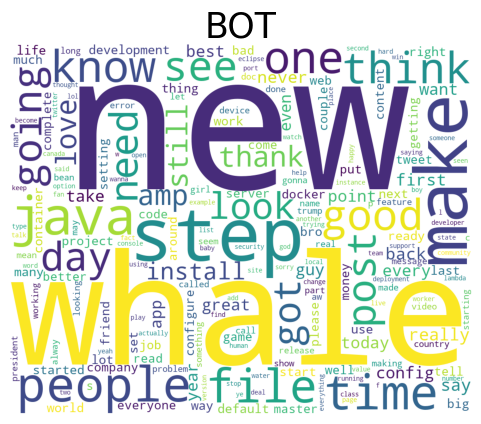

In [ ]:
df_bot = data[data['account_type']=='bot']
bot = df_bot['tweets'].to_string(index=False)

plt.title('BOT', fontsize=25)
bot_wordcloud=WordCloud(width=1000, height=800, background_color='white').generate(bot)
plt.imshow(bot_wordcloud)
plt.axis('off')

### Wordcloud 'Human'

(-0.5, 999.5, 799.5, -0.5)

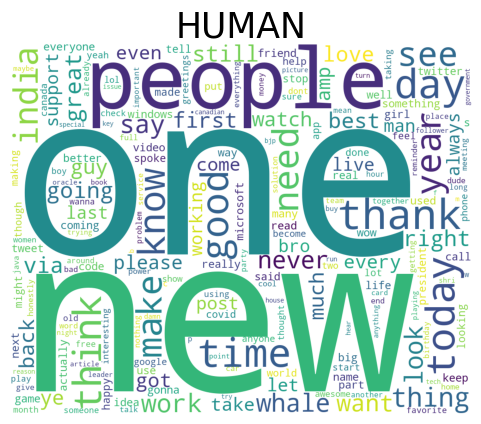

In [ ]:
df_human = data[data['account_type']=='human']
human = df_human['tweets'].to_string(index=False)

plt.title('HUMAN', fontsize=25)
human_wordcloud=WordCloud(width=1000, height=800, background_color='white').generate(human)
plt.imshow(human_wordcloud)
plt.axis('off')

### Stemming 

In [ ]:
# Define a function to stem a sentence
def stem_sentence(sentence):

        # Initialize PorterStemmer
    stemmer = SnowballStemmer(language='english')

        # Tokenize the sentence into words
    words = word_tokenize(sentence)

        # Stem each word and return the stemmed sentence
    return ' '.join([stemmer.stem(word) for word in words])
    
dfx = data.copy()
dfx['tweets'] = dfx['tweets'].apply(stem_sentence)
print("Stemming Completed!")

Stemming Completed!


In [ ]:
n_sample = 3
samples = np.random.randint(0,len(dfx['tweets'])-1,n_sample)
for i in range(len(samples)):
    print(f"Sample# {i+1}")
    print()
    print("ORIGINAL")
    print(data['tweets'][samples[i]])
    print("."*125)
    print('STEMMED')
    print(dfx['tweets'][samples[i]])
    print("_"*125)

Sample# 1

ORIGINAL
bet businessman well poll see happens trump well worst view big donation trump
.............................................................................................................................
STEMMED
bet businessman well poll see happen trump well worst view big donat trump
_____________________________________________________________________________________________________________________________
Sample# 2

ORIGINAL
morpheustay stan nct
.............................................................................................................................
STEMMED
morpheustay stan nct
_____________________________________________________________________________________________________________________________
Sample# 3

ORIGINAL
never seen site yes power user super human speed
.............................................................................................................................
STEMMED
never seen site yes power user super huma

### Lemmatization

In [ ]:
nlp1 = spacy.load('en_core_web_sm')
def newlemma(sentence):
    doc = nlp1(sentence)
    
    return ' '.join([token.lemma_ for token in doc])
dflm = data.copy()
dflm['tweets'] = data['tweets'].apply(newlemma)
print("Lemmatization Completed!")

Lemmatization Completed!


In [ ]:

data[data['lan'] != 'en']

,index,status_id,account_type,tweets,charCount,wordsInSen,capitalChar,senNumber,doubleQuoteWord,uniqueWord,...,avgSenLen,stopWordsCount,punctuationCount,unusualExc,exclamationCount,doubleEqualCount,noPosWords,noNegWords,noNeutralWords,lan


In [19]:
n_sample = 3
samples = np.random.randint(0,len(data['tweets'])-1,n_sample)
for i in range(len(samples)):
    print(f"Sample# {i+1}")
    print()
    print("ORIGINAL")
    print(data['tweets'][samples[i]])
    print("."*125)
    print('Lammetized')
    print(dflm['tweets'][samples[i]])
    print("_"*125)

NameError: name 'data' is not defined

### Data Visualization

<Axes: xlabel='account_type', ylabel='count'>

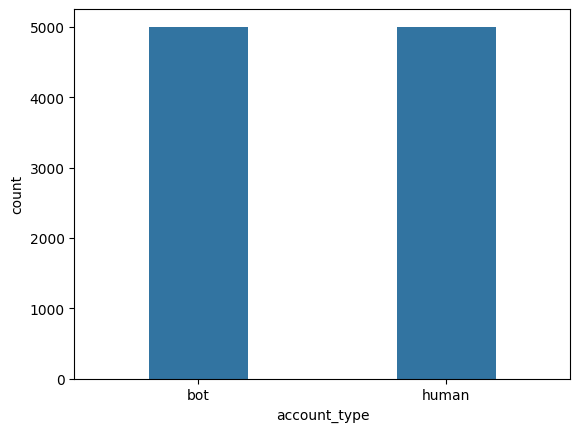

In [ ]:
sns.countplot(data=df , x = 'account_type' , width = 0.4)

<Axes: ylabel='count'>

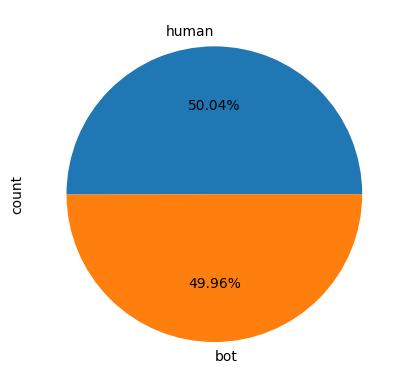

In [ ]:
df['account_type'].value_counts().plot.pie(autopct='%1.2f%%')

- Above plot depicts that human and bot has equal no. of tweets in data

In [ ]:
dfnew = df.copy()

In [ ]:
# count number of characters in each tweet
dfnew['char_len'] = dfnew.tweets.str.len()

# count number of words in each tweet
# word_tokens = [len(word_tokenize(tweet)) for tweet in dfnew.tweets]
dfnew['word_len'] = dfnew.tweets.apply(lambda x: len(word_tokenize(x)))

# count number of sentence in each tweet
# sent_tokens = [len(sent_tokenize(tweet)) for tweet in dfnew.tweets]
dfnew['sent_len'] = dfnew.tweets.apply(lambda x: len(sent_tokenize(x)))

In [ ]:
dfnew

,status_id,account_type,tweets,charCount,wordsInSen,capitalChar,senNumber,doubleQuoteWord,uniqueWord,avgWordLen,...,punctuationCount,unusualExc,exclamationCount,doubleEqualCount,noPosWords,noNegWords,noNeutralWords,char_len,word_len,sent_len
0,1208265880146046976,bot,YEA now that note GOOD,22,5,2,1,0,5,3.600000,...,0,0,0,0,1,0,4,22,5,1
1,1091463908118941696,human,Listen to This Charming Man by The Smiths htt...,66,8,0,1,0,9,6.222222,...,5,0,0,0,1,0,7,66,11,1
2,1199055191028293633,bot,たぶんあの時からわたしは……そなたが,18,0,0,1,0,1,18.000000,...,0,0,0,0,0,0,0,18,1,1
3,1214698264701722626,bot,The decade in the significantly easier schedul...,63,9,1,1,0,11,4.818182,...,1,0,0,0,0,0,9,63,12,1
4,1209229478934695937,bot,"""Theim class=\""alignnone size-full wp-image-60...",180,3,0,1,0,11,10.285714,...,50,0,0,0,0,0,3,180,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1079168305401864192,human,@brithume Phillips OneBlade,27,3,0,1,0,3,8.333333,...,1,0,0,0,0,0,3,27,4,1
9996,1218357332008144897,human,"Bawa gua pulang tolooong, ini bukan tempat gue",46,8,0,1,0,8,4.750000,...,1,0,0,0,0,0,8,46,9,1
9997,1089179099245961216,human,Using a Raspberry Pi Zero SCSI adapter to brin...,127,17,1,1,0,19,5.944444,...,6,0,0,0,0,0,17,127,21,1
9998,1145460965556666370,human,Ive decided to not be a part of asexual anymor...,111,22,0,1,0,20,4.090909,...,0,0,0,0,0,0,22,111,22,1


#### Plot of Tweets Character Count between 'Human' and 'Bot'

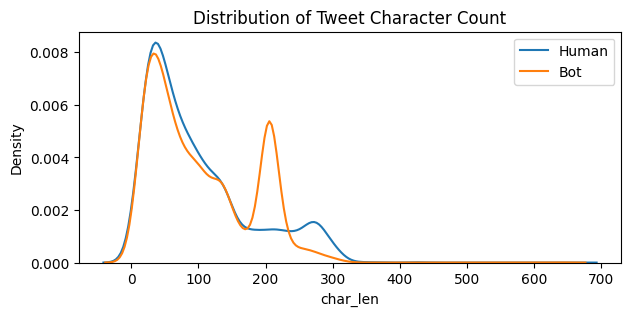

In [ ]:
fig, ax = plt.subplots(figsize = (7, 3))

#create graphs
sns.kdeplot(dfnew['char_len'][dfnew['account_type'] == 'human'], label = 'Human')
sns.kdeplot(dfnew['char_len'][dfnew['account_type'] == 'bot'], label = 'Bot')

#set title and plot
plt.title('Distribution of Tweet Character Count')
plt.legend()
plt.show()

#### Plot of Tweets Word Count between 'Human' and 'Bot'

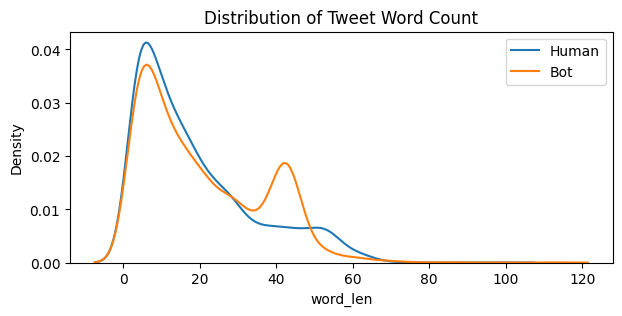

In [ ]:
fig, ax = plt.subplots(figsize = (7, 3))

#create graphs
sns.kdeplot(dfnew['word_len'][dfnew['account_type'] == 'human'], label = 'Human')
sns.kdeplot(dfnew['word_len'][dfnew['account_type'] == 'bot'], label = 'Bot')

#set title and plot
plt.title('Distribution of Tweet Word Count')
plt.legend()
plt.show()

#### Plot of Tweets Sentence Count between 'Human' and 'Bot'

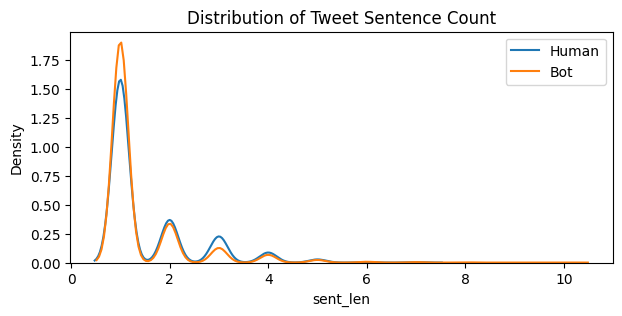

In [ ]:
fig, ax = plt.subplots(figsize = (7, 3))

#create graphs
sns.kdeplot(dfnew['sent_len'][dfnew['account_type'] == 'human'], label = 'Human')
sns.kdeplot(dfnew['sent_len'][dfnew['account_type'] == 'bot'], label = 'Bot')

#set title and plot
plt.title('Distribution of Tweet Sentence Count')
plt.legend()
plt.show()

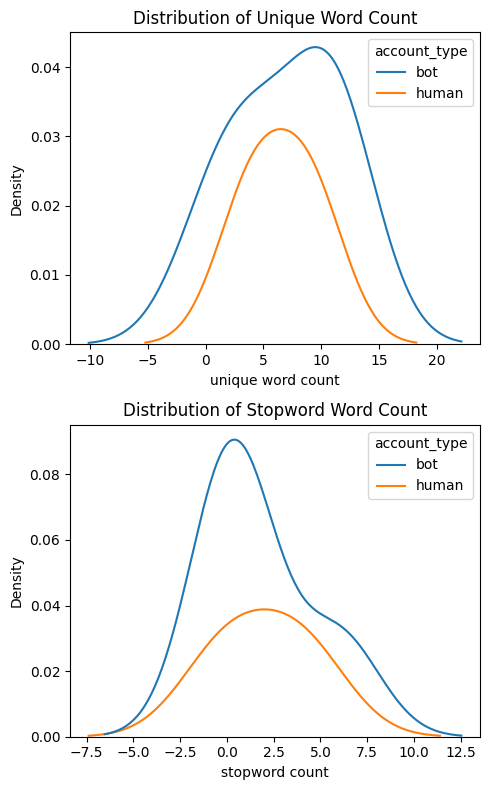

In [ ]:
#add unique word count
dfnew['unique word count'] = dfnew['tweets'].apply(lambda x: len(set(x.split())))

#add stopword count
dfnew['stopword count'] = dfnew['tweets'].apply(lambda x: len([i for i in x.lower().split() if i in wordcloud.STOPWORDS]))

#split so we can use updated train set
train = dfnew[:len('tweets')]

human = train['account_type'] == 'human'

#produce graphs to visualize newly added features
fig, axes = plt.subplots(2, figsize=(5, 8))

graph1 = sns.kdeplot(data = train , x = 'unique word count', hue='account_type' , ax=axes[0])
graph1.set_title('Distribution of Unique Word Count')

graph2 = sns.kdeplot(data = train , x = 'stopword count', hue='account_type' , ax=axes[1])
graph2.set_title('Distribution of Stopword Word Count')

fig.tight_layout()
plt.show()

#### Top 10 most common words in 'Human' and 'Bot'

Text(0.5, 1.0, "Top 10 words and their occurences for 'Human'")

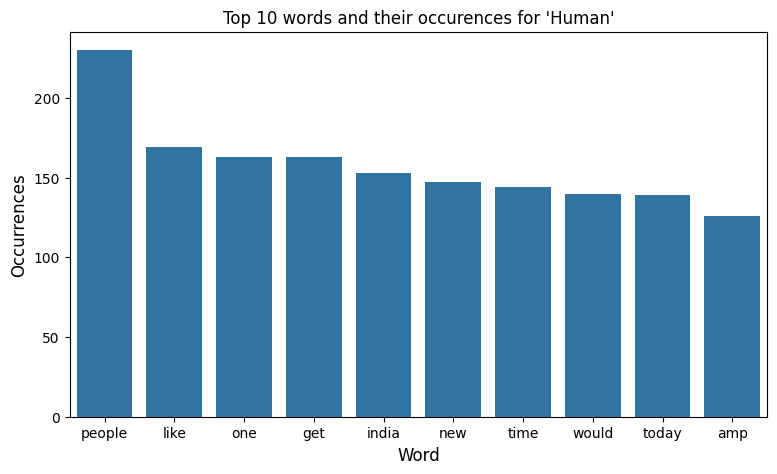

In [ ]:
# Plotting word lenghts of tweets using the matplotlib
length_of_word = data[data["account_type"]=='human']['tweets'].str.findall(r"(\w+)").explode().value_counts()
top_10 = length_of_word.nlargest(10)

fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(x=top_10.index, y=top_10.values, ax=ax)
ax.set_ylabel('Occurrences', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
plt.title("Top 10 words and their occurences for 'Human'")

Text(0.5, 1.0, "Top 10 words and their occurences for 'Bot'")

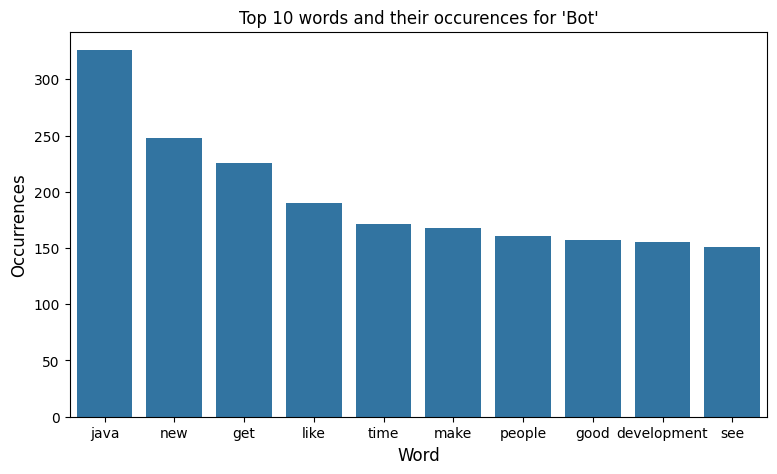

In [ ]:
# Plotting word lenghts of tweets using the matplotlib
length_of_word = data[data["account_type"]=='bot']['tweets'].str.findall(r"(\w+)").explode().value_counts()
top_10 = length_of_word.nlargest(10)

fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(x=top_10.index, y=top_10.values, ax=ax)
ax.set_ylabel('Occurrences', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
plt.title("Top 10 words and their occurences for 'Bot'")

In [ ]:
dflm.loc[dflm['account_type']=='human' , 'account_type'] = 1
dflm.loc[dflm['account_type']=='bot' , 'account_type'] = 0
dflm['account_type']=dflm['account_type'].astype('int64')

In [ ]:
# Remove column name 'index'
dflm.drop(['index'], axis=1 , inplace = True)

In [ ]:
dflm.head()

,status_id,account_type,tweets,charCount,wordsInSen,capitalChar,senNumber,doubleQuoteWord,uniqueWord,avgWordLen,avgSenLen,stopWordsCount,punctuationCount,unusualExc,exclamationCount,doubleEqualCount,noPosWords,noNegWords,noNeutralWords,lan
0,1208265880146046976,0,yea note good,22,5,2,1,0,5,3.600000,5.0,1,0,0,0,0,1,0,4,en
1,1091463908118941696,1,listen charming man smith,66,8,0,1,0,9,6.222222,8.0,2,5,0,0,0,1,0,7,en
2,1214698264701722626,0,decade significantly easy schedule like,63,9,1,1,0,11,4.818182,9.0,3,1,0,0,0,0,0,9,en
3,1209229478934695937,0,theim class alignnone size full image src alt ...,180,3,0,1,0,11,10.285714,3.0,0,50,0,0,0,0,0,3,en
4,1199866315504308224,0,world need whale story would love know whalefa...,92,17,1,2,0,17,4.352941,8.5,8,2,0,0,0,2,0,15,en


### Tf-IDf Vectorizer

In [ ]:
"""
Tf-IDf Vectorizer
"""
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# scaling the features columns
extracted_features = ['charCount', 'wordsInSen', 'capitalChar', 'senNumber', 'doubleQuoteWord', 'uniqueWord', 'avgWordLen', 'avgSenLen', 'stopWordsCount', 'punctuationCount', 'unusualExc', 'exclamationCount', 'doubleEqualCount', 'noPosWords', 'noNegWords', 'noNeutralWords']
scaler = MinMaxScaler()
vectorizer = TfidfVectorizer(use_idf=True, norm='l2', smooth_idf=True)
def scalingFeatures(df):
    extracted_features_data= df.loc[:, extracted_features]
    return pd.DataFrame(scaler.fit_transform(extracted_features_data))

In [ ]:
# getting the merged dataframe having both extracted features and tfidf of text column
def getMergedDf(dflm, scaledDf):
    df_tf_vectorizer = vectorizer.fit(dflm['tweets'])
    df_tf_vect = df_tf_vectorizer.transform(dflm['tweets']).toarray()
    df_tf = pd.DataFrame(df_tf_vect)
#     print(df_tf)
    return pd.merge(df_tf, scaledDf, left_index=True, right_index=True)
#     return df_tf

In [ ]:
# get merged dataframe 
scaledDf = scalingFeatures(dflm)
mergedDf = getMergedDf(dflm, scaledDf)
print('shape of merged df is ', mergedDf.shape)

shape of merged df is  (6825, 12444)


In [ ]:
mergedDf

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.052411,0.094340,0.029412,0.000000,0.0,0.0,0.0,0.125,0.0,0.071429
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.160445,0.150943,0.058824,0.031447,0.0,0.0,0.0,0.125,0.0,0.125000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.102600,0.169811,0.088235,0.006289,0.0,0.0,0.0,0.000,0.0,0.160714
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.327859,0.056604,0.000000,0.314465,0.0,0.0,0.0,0.000,0.0,0.053571
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.083432,0.160377,0.235294,0.012579,0.0,0.0,0.0,0.250,0.0,0.267857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.078585,0.320755,0.294118,0.000000,0.0,0.0,0.0,0.125,0.0,0.285714
6821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099791,0.301887,0.117647,0.012579,0.0,0.0,0.0,0.000,0.0,0.285714
6822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.149001,0.320755,0.147059,0.037736,0.0,0.0,0.0,0.000,0.0,0.303571
6823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.072636,0.415094,0.352941,0.000000,0.0,0.0,0.0,0.000,0.0,0.392857


In [ ]:
X = mergedDf
y = dflm['account_type']

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y
6441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.079191,0.113208,0.029412,0.006289,0.0,0.0,0.0,0.000,0.0,0.107143
3578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.110091,0.132075,0.088235,0.012579,0.0,0.0,0.0,0.125,0.0,0.107143
896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.085371,0.188679,0.117647,0.006289,0.0,0.0,0.0,0.000,0.0,0.178571
5164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.063005,0.264151,0.205882,0.000000,0.0,0.0,0.0,0.000,0.0,0.250000
4434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.032269,0.150943,0.147059,0.000000,0.0,0.0,0.0,0.000,0.0,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.059736,0.132075,0.176471,0.000000,0.0,0.0,0.0,0.000,0.0,0.125000
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090047,0.698113,0.558824,0.012579,0.0,0.0,0.0,0.000,0.0,0.660714
5226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087019,0.226415,0.382353,0.018868,0.0,0.0,0.0,0.125,0.0,0.410714
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.100203,0.452830,0.411765,0.075472,0.0,0.0,0.0,0.125,0.0,0.410714


In [ ]:
Y_train

6441    0
3578    1
896     1
5164    1
4434    0
       ..
3772    0
5191    0
5226    1
5390    0
860     0
Name: account_type, Length: 5118, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X_train.columns = X_train.columns.astype(str)

In [ ]:
X_test.columns = X_test.columns.astype(str)

### ML Algorithms

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, Y_train)

y_pred_lr = LRclassifier.predict(X_test)

In [ ]:
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NBC = MultinomialNB()
NBC.fit(X_train, Y_train)

y_pred_nbc = NBC.predict(X_test)

In [ ]:
#Accuracy
acc_test_nbc = accuracy_score(Y_test,y_pred_nbc)
print("Accuracy of Testing Data with Naive Bayes Classifier : ",acc_test_nbc)

Accuracy of Testing Data with Naive Bayes Classifier :  0.6678383128295254


#### Decision Tree

In [ ]:
#Decision Tree using Gini Index
from sklearn import tree 
dtc = tree.DecisionTreeClassifier(criterion='gini')

dtc.fit(X_train, Y_train)

y_pred_dtc = dtc.predict(X_test)

In [ ]:
#Accuracy
accuracy_score(Y_test,y_pred_dtc)

0.680140597539543

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
#Accuracy
accuracy_score(Y_test,y_pred_rf)

0.7240773286467487

#### XG Boost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
y_pred_xg = xgb.predict(X_test)

In [ ]:
#Accuracy
accuracy_score(Y_test,y_pred_xg)

0.7123608670181605

#### SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', degree=3, C=1)
svm.fit(X_train, Y_train)

y_pred_svm = svm.predict(X_test)

In [ ]:
#Accuracy
acc_test_svm =accuracy_score(Y_test,y_pred_svm)
print("Accuracy of Testing Data with Support Vector Machine : ",acc_test_svm)

Accuracy of Testing Data with Support Vector Machine :  0.7100175746924429


#### K-Fold Cross Validation

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
from sklearn.model_selection import KFold , cross_val_score

In [ ]:
k=10
k_fold = KFold(n_splits=k, random_state=None)
score_lr = cross_val_score(SVC(kernel='linear', degree=3, C=1), X, y , cv=k_fold , error_score='raise')
print(score_lr)
print("Avg :",np.average(score_lr))

In [ ]:
k=5
k_fold = KFold(n_splits=k, random_state=None)
score_rf = cross_val_score(RandomForestClassifier(n_estimators=50), X, y , cv=k_fold , error_score='raise')
print(score_rf)
print("Avg :",np.average(score_rf))

In [ ]:
k=5
k_fold = KFold(n_splits=k, random_state=None)
score_xg = cross_val_score(XGBClassifier(), X, y , cv=k_fold , error_score='raise')
print(score_xg)
print("Avg :",np.average(score_xg))

In [ ]:
'''
GridsearchCV 
'''

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn import metrics

In [ ]:
def run_grid(X_train, X_test, y_train, y_test):
    
    # Define the models and hyperparameters
    models = {
        'MultinomialNB': (MultinomialNB(), {'alpha': [0.1, 1.0, 10.0],
                                            'fit_prior': [True, False]}),   
        'LinearSVC': (LinearSVC(), {'C': [0.1, 1.0, 10.0]}),
        'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1.0, 10.0],
                                                      'penalty': ['l1', 'l2'],
                                                      'solver': ['liblinear', 'newton-cg', 'sag']}),
        'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
        'GradientBoostingClassifier': (GradientBoostingClassifier(), {'n_estimators': [10, 50,100],
                                                                      'n_iter_no_change': [50]}),
        'RandomForestClassifier': (RandomForestClassifier(), {'n_estimators': [10, 50,100]}),
    }
# Define result list that will be used to store the results for each model.
    results_list = []
    
    # Iterate GridSearchCV to each model and print the best score and parameters
    for classifier_name, (model, params) in models.items():
        
        # creates a GridSearchCV object for the current model
        grid = GridSearchCV(model, params, cv=5, n_jobs=-1)
        
        # Records the starting time for the grid search
        start_time = time.time()
        
        print(f'Running GridSearchCV for {classifier_name}.....')
        
        # Fits the GridSearchCV object on the training data
        grid.fit(X_train, y_train)
        
        # Predicts labels on the test data using the best hyperparameters
        pred = grid.predict(X_test)

        # Calculates the accuracy score on the test data.
        acc_score = accuracy_score(y_test, pred)
        
        # Records the ending time for the grid search
        end_time = time.time()
        
        # Calculates the total running time for the grid search
        running_time = end_time-start_time

        # Print the best hyperparameters and the best score
        print(f"Best Hyperparameters for {classifier_name}: {grid.best_params_}")
        print(f"Best Validate Score for {classifier_name}: {grid.best_score_:.3f}")
        print(f"Accuracy Testing score for {classifier_name}: {acc_score:.3f}")
        print(f"Running Time for {classifier_name}: {running_time:.3f} seconds")
        
        # Plot confusion matrix from best parameter
#         plot_cm(y_test, pred)
#         print('='*40)
        print()
        print()
        
        # Appends a list of results for the current model
        results_list.append([classifier_name, grid.best_params_, grid.best_score_, acc_score, running_time])
    
    # Create a dataframe form result list
    df=pd.DataFrame(results_list, columns=['classifier_name', 'best_params', 'best_val_score','test_score', 'running_time'])
    return df
        

In [ ]:
def highlighter(df):
    df_styled = df.style.highlight_max(subset=['best_val_score','test_score'], color = 'lightgreen')
    df_styled = df_styled.highlight_min(subset=['best_val_score','test_score'], color = 'pink')
    df_styled = df_styled.highlight_max(subset=['running_time'], color = 'pink')
    df_styled = df_styled.highlight_min(subset=['running_time'], color = 'lightgreen')
    return df_styled

In [ ]:
s_tfidf_df = run_grid(X_train=X_train, 
                      X_test=X_test, 
                      y_train=Y_train, 
                      y_test=Y_test)

highlighted_df = highlighter(s_tfidf_df)
highlighted_df

Running GridSearchCV for MultinomialNB.....


Best Hyperparameters for MultinomialNB: {'alpha': 0.1, 'fit_prior': False}
Best Validate Score for MultinomialNB: 0.662
Accuracy Testing score for MultinomialNB: 0.673
Running Time for MultinomialNB: 22.916 seconds


Running GridSearchCV for LinearSVC.....
Best Hyperparameters for LinearSVC: {'C': 0.1}
Best Validate Score for LinearSVC: 0.692
Accuracy Testing score for LinearSVC: 0.697
Running Time for LinearSVC: 18.101 seconds


Running GridSearchCV for LogisticRegression.....
Best Hyperparameters for LogisticRegression: {'C': 10.0, 'penalty': 'l2', 'solver': 'sag'}
Best Validate Score for LogisticRegression: 0.693
Accuracy Testing score for LogisticRegression: 0.699
Running Time for LogisticRegression: 166.820 seconds


Running GridSearchCV for KNeighborsClassifier.....
Best Hyperparameters for KNeighborsClassifier: {'n_neighbors': 7}
Best Validate Score for KNeighborsClassifier: 0.672
Accuracy Testing score for KNeighborsClassifier: 0.685
Running Time for KNeighborsClassifier: 30.99

,classifier_name,best_params,best_val_score,test_score,running_time
0,MultinomialNB,"{'alpha': 0.1, 'fit_prior': False}",0.662370,0.673111,22.915703
1,LinearSVC,{'C': 0.1},0.692261,0.697129,18.101468
2,LogisticRegression,"{'C': 10.0, 'penalty': 'l2', 'solver': 'sag'}",0.692654,0.698887,166.819810
3,KNeighborsClassifier,{'n_neighbors': 7},0.672332,0.684827,30.997827
4,GradientBoostingClassifier,"{'n_estimators': 100, 'n_iter_no_change': 50}",0.715511,0.707674,803.663460
5,RandomForestClassifier,{'n_estimators': 50},0.732510,0.724077,54.176015


### Saving the Model

In [ ]:
import pickle
pickle.dump(svm, open('svm_model.pkl', 'wb'))